# Case Study - Bike Sharing : Boom Bikes

<b>Problem Statement: </b>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company want to understand the factors affecting the demand for these shared bikes in the American market. <br/>
The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [3]:
bike_data = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Inspect the various aspects of the housing dataframe

In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data Cleaning & Formatting

In [8]:
#Remove unwanted columns
bike_data = bike_data.drop(['registered', 'casual','instant'], axis=1)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Convert date to day
bike_data['day'] = pd.to_datetime(bike_data['dteday'],  format='%d-%m-%Y').dt.day

In [10]:
#Delete the column after formating
bike_data = bike_data.drop(['dteday'], axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [11]:
# Checking for duplicate rows
display(bike_data[bike_data.duplicated()].shape)

(0, 13)

<font color="blue">Summary : No Duplicate Rows</font>

In [12]:
# Check for missing values
print(bike_data.isnull().sum())  # No missing values found

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64


In [13]:
display(bike_data.nunique())

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
day            31
dtype: int64

## Step 3: Visualising the Data

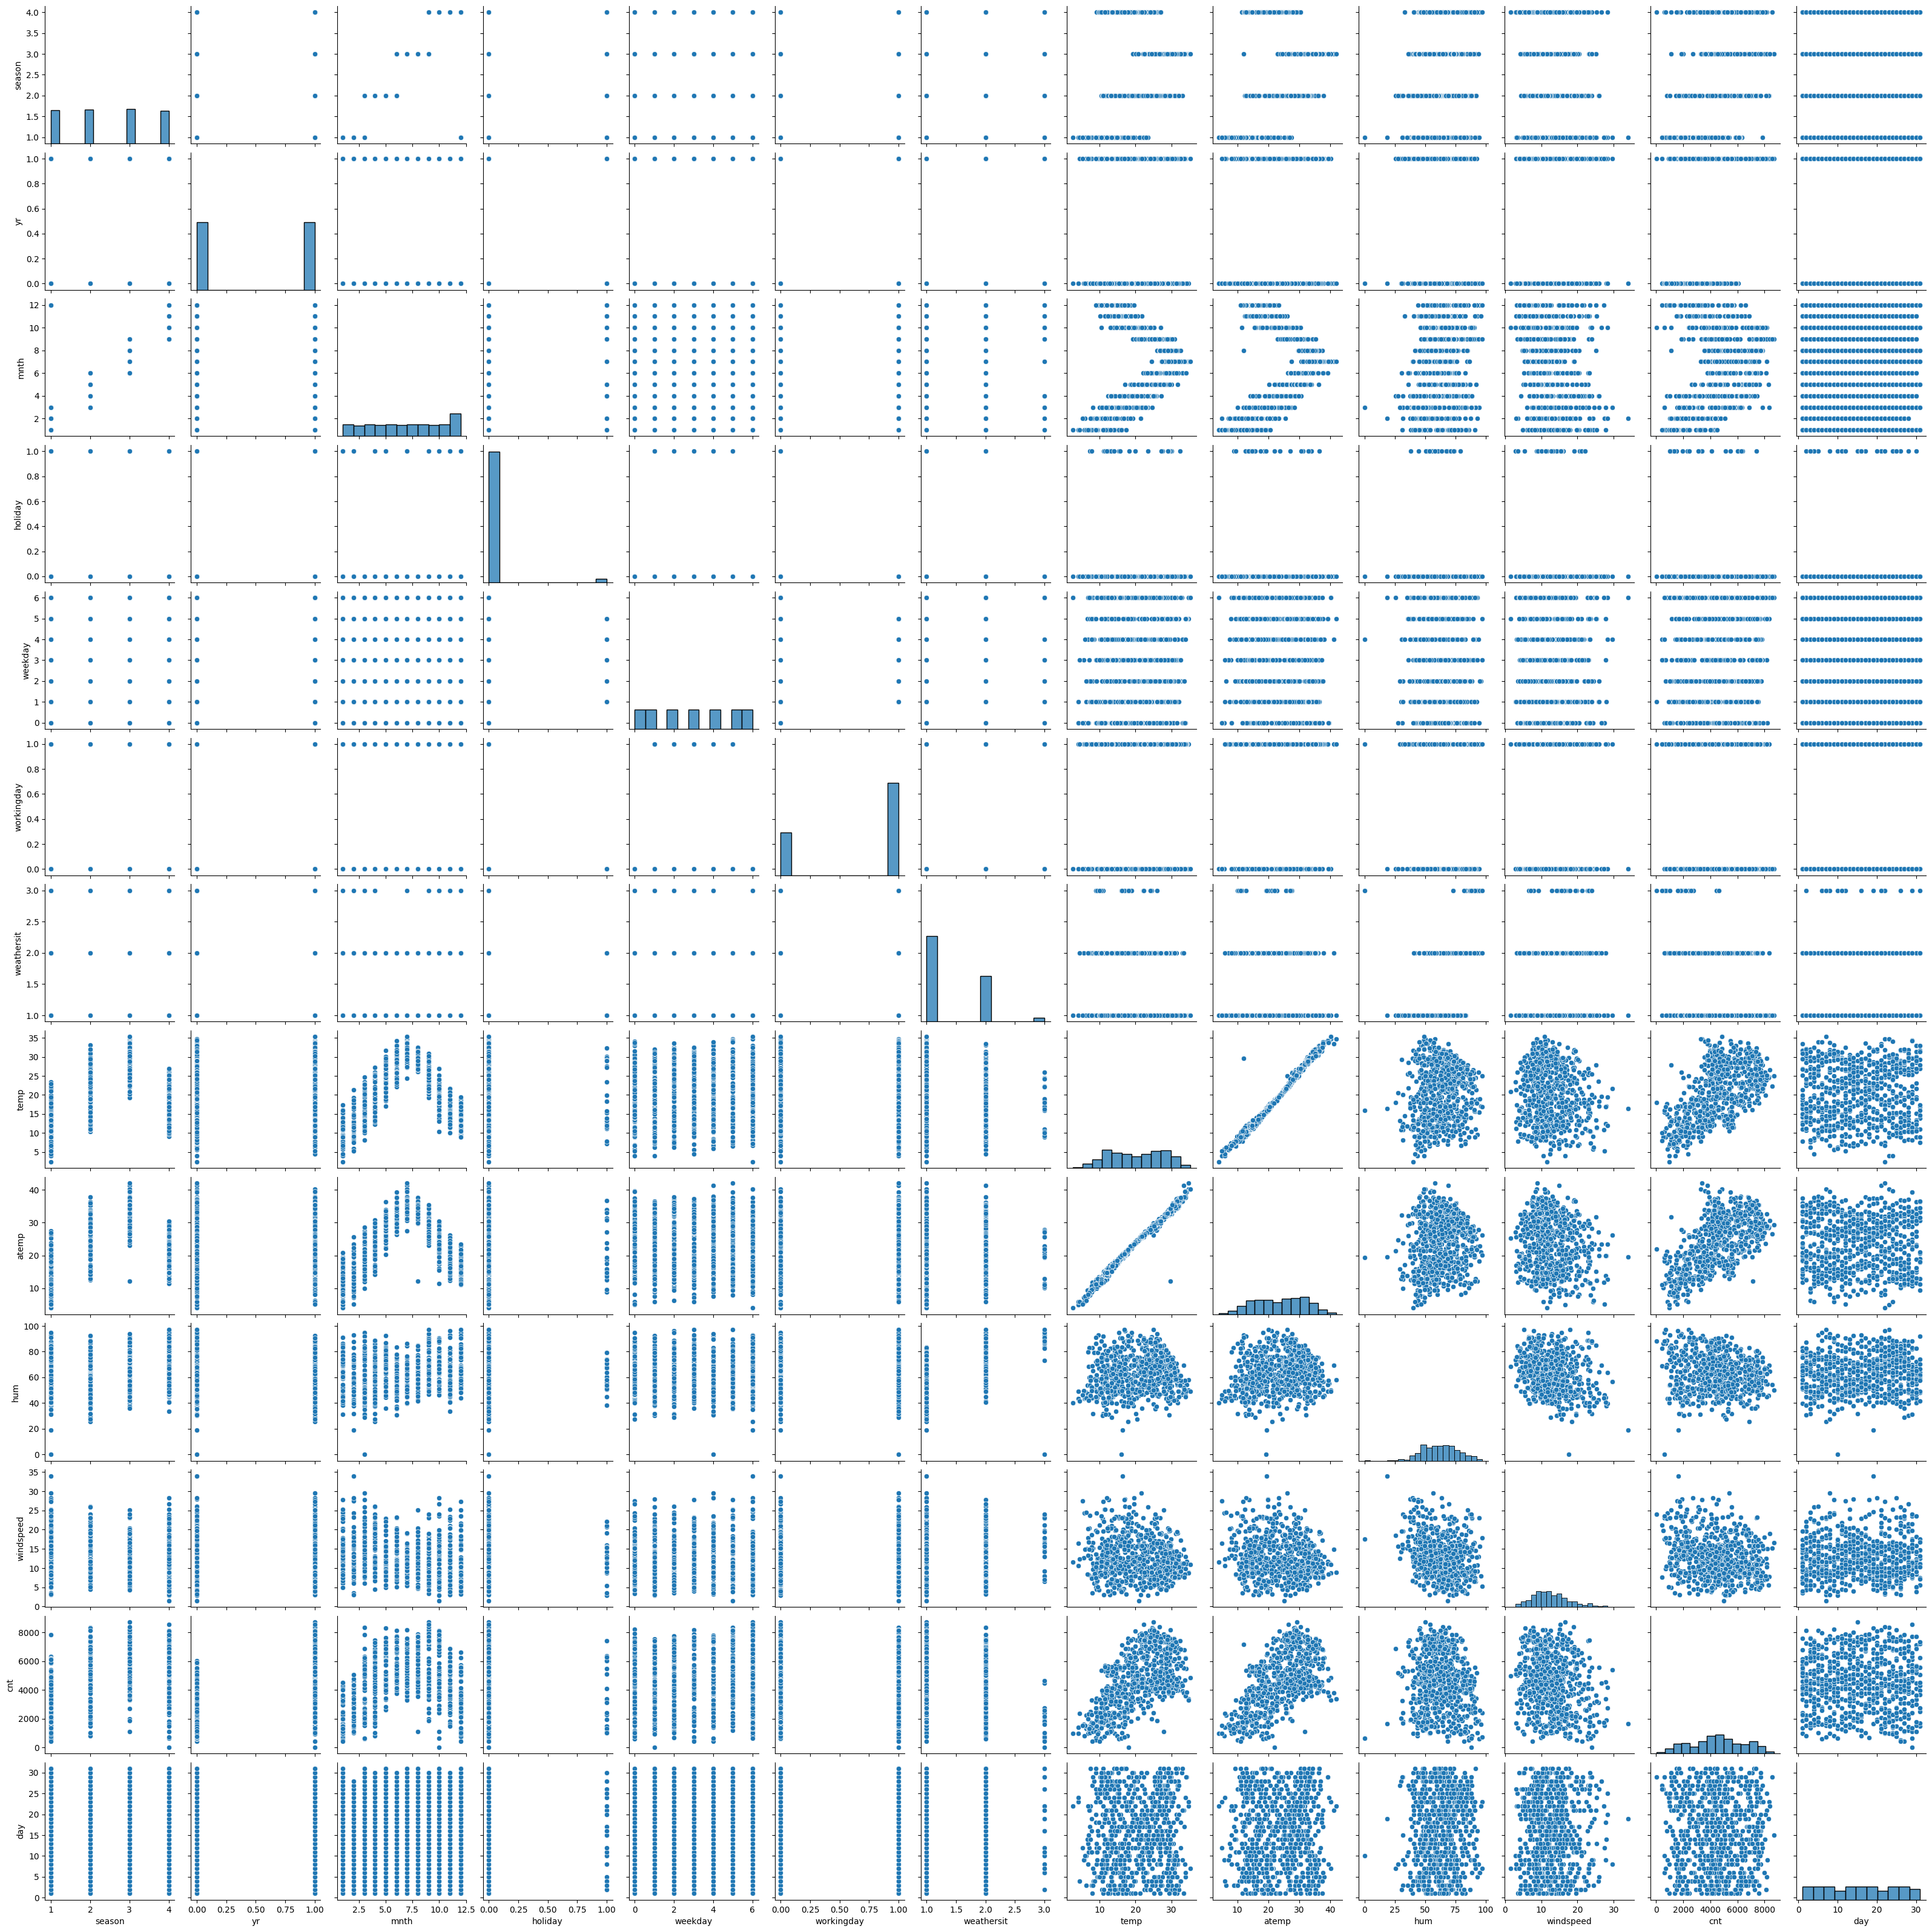

In [14]:
#Let's make a pairplot of all the numeric variables
sns.pairplot(bike_data)
plt.show()

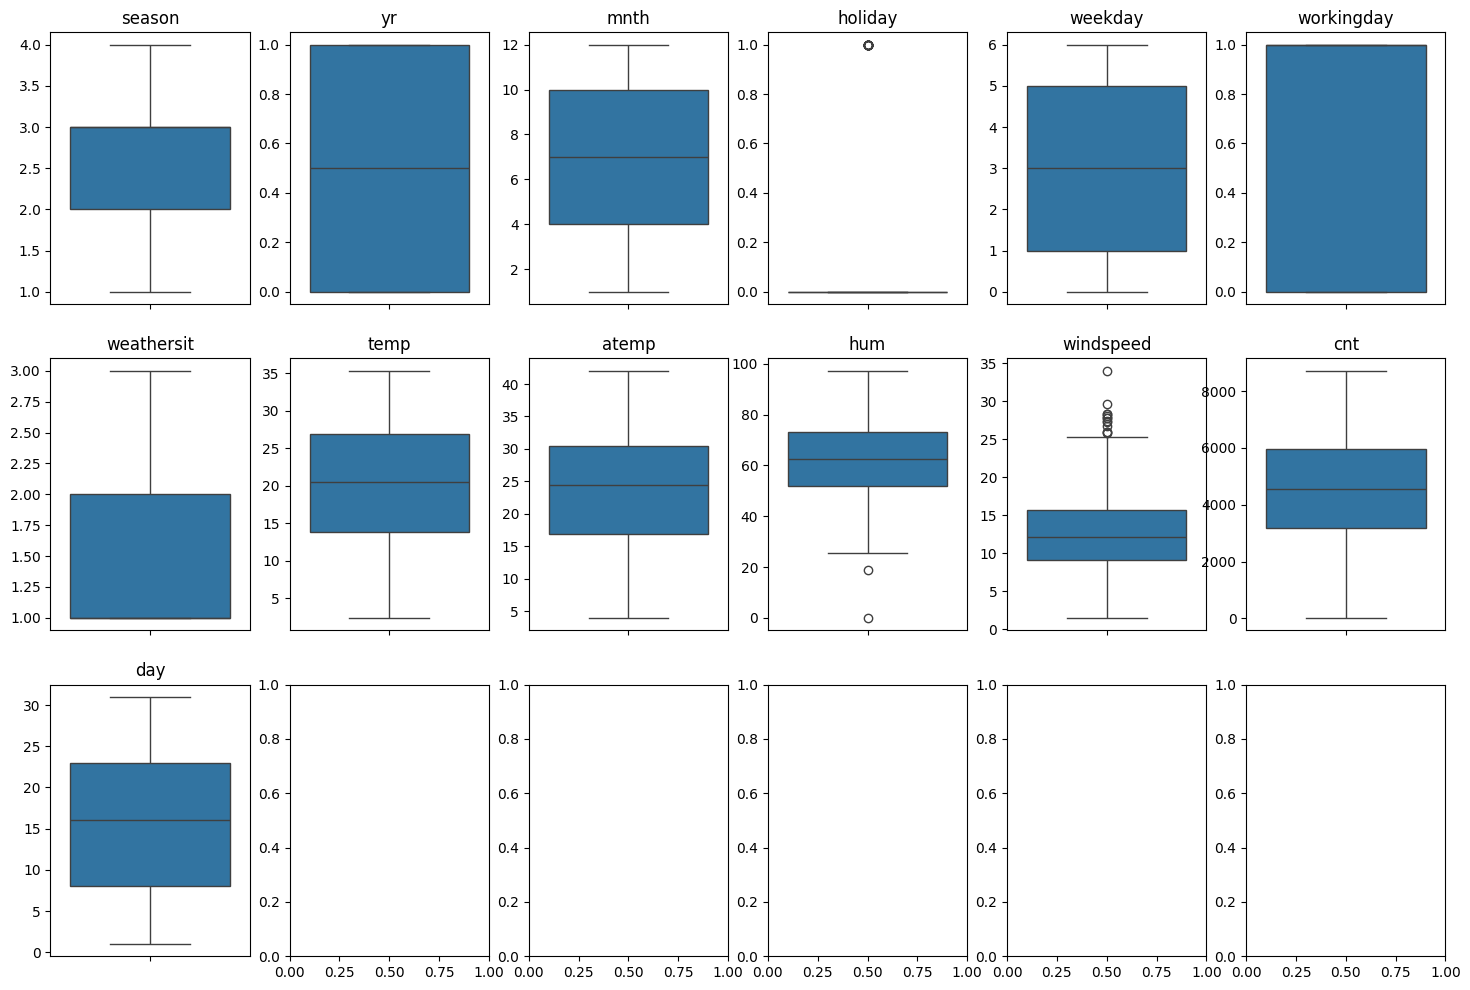

In [15]:
ncols=6
nrows=round(16/ncols)
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 12))
ax = ax.flatten()
for index, column in enumerate(bike_data.columns):
    sns.boxplot(data=(bike_data[column]), ax=ax[index])
    ax[index].set_title(column)
    ax[index].set_ylabel(None)
plt.show()

<font color='blue'>
<b>Summary:</b><br/>
1) No duplicate rows<br/>
2) No Missing Values<br/>
3) Data looks to be good
</font>

## Step 3: Data Preparation

In [16]:
# Convert 'season', 'weathersit', 'mnth', 'weekday' to categorical strings
bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
bike_data['mnth'] = bike_data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5 : 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0: 'Sun',1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5 : 'Fri', 6: 'Sat'})
#Print the values after conversion
print(bike_data)

     season  yr mnth  holiday weekday  workingday weathersit       temp  \
0    spring   0  Jan        0     Sat           0       Mist  14.110847   
1    spring   0  Jan        0     Sun           0       Mist  14.902598   
2    spring   0  Jan        0     Mon           1      Clear   8.050924   
3    spring   0  Jan        0     Tue           1      Clear   8.200000   
4    spring   0  Jan        0     Wed           1      Clear   9.305237   
..      ...  ..  ...      ...     ...         ...        ...        ...   
725  spring   1  Dec        0     Thu           1       Mist  10.420847   
726  spring   1  Dec        0     Fri           1       Mist  10.386653   
727  spring   1  Dec        0     Sat           0       Mist  10.386653   
728  spring   1  Dec        0     Sun           0      Clear  10.489153   
729  spring   1  Dec        0     Mon           1       Mist   8.849153   

        atemp      hum  windspeed   cnt  day  
0    18.18125  80.5833  10.749882   985    1  
1    

<b>Handling Categorical Variables and Creating Dummy Variables - Univariate Analysis</b>

In [17]:
#Categorical columns
categorical_cols = ['season', 'weathersit', 'mnth', 'weekday']
print(categorical_cols)

['season', 'weathersit', 'mnth', 'weekday']


In [18]:
#Numerical columns
numeric_cols = bike_data.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']


<b>Data visualization with categorical columns</b>

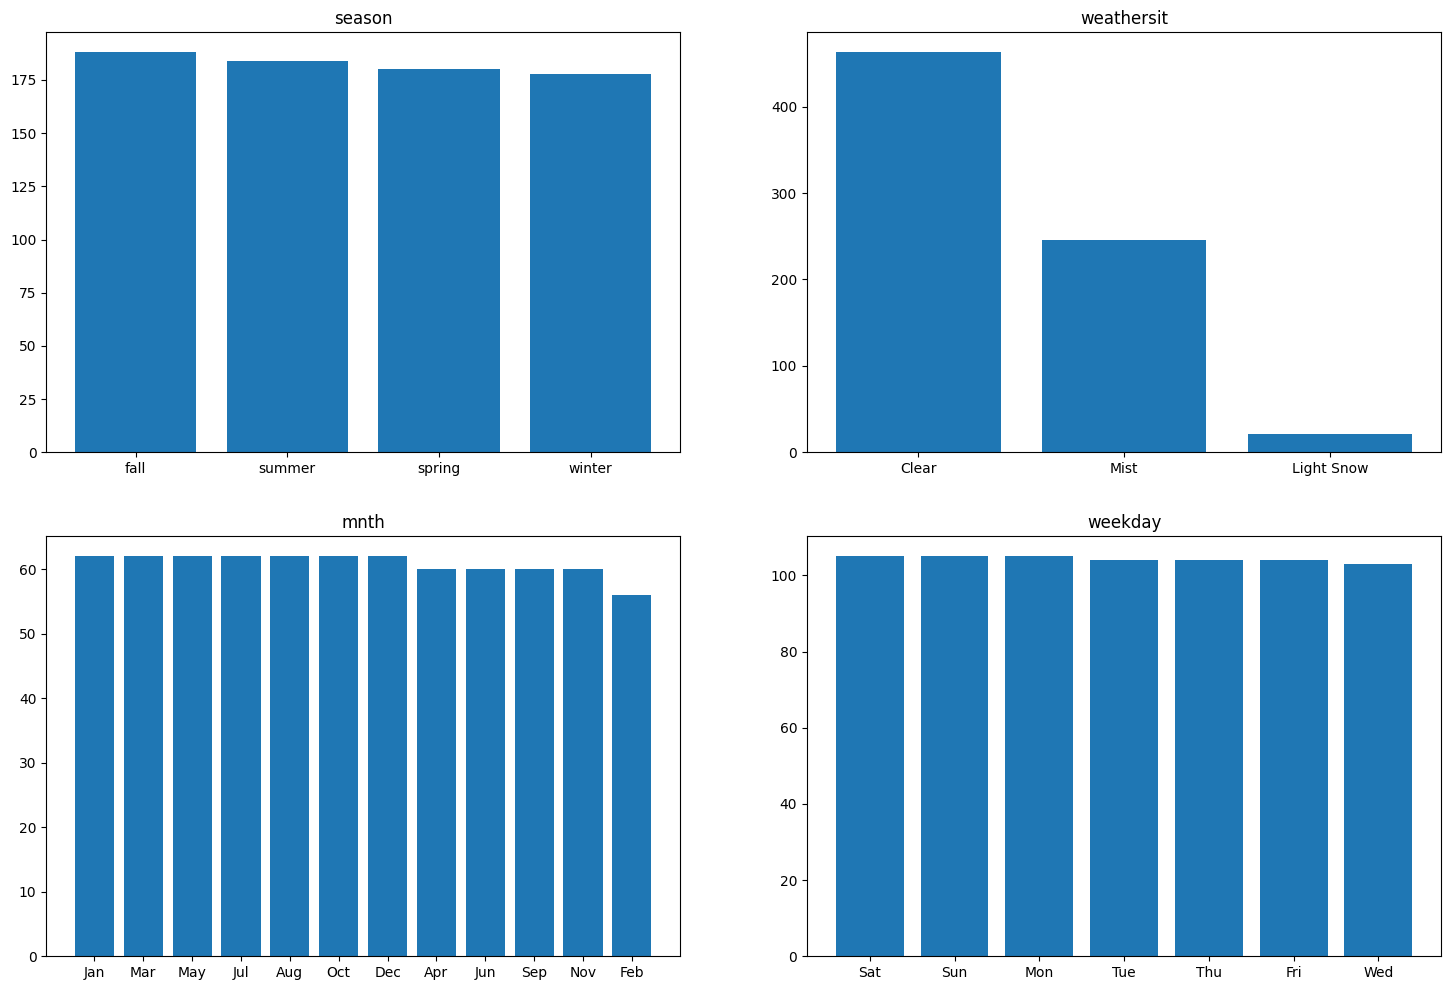

In [19]:
#Data visualisation for numerical and categorical values - Bar chart
columns_to_plot=pd.Series(categorical_cols)
columns_to_plot = columns_to_plot[~columns_to_plot.isin(
    ['cnt'])]
ncols=2
nrows=2
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 12))
ax = ax.flatten()
for index, column in enumerate(columns_to_plot):
    df = bike_data[column].value_counts()
    ax[index].bar(df.index, df.values)
    ax[index].set_title(column)
plt.show()

<b>Data visualization with numerical columns</b>

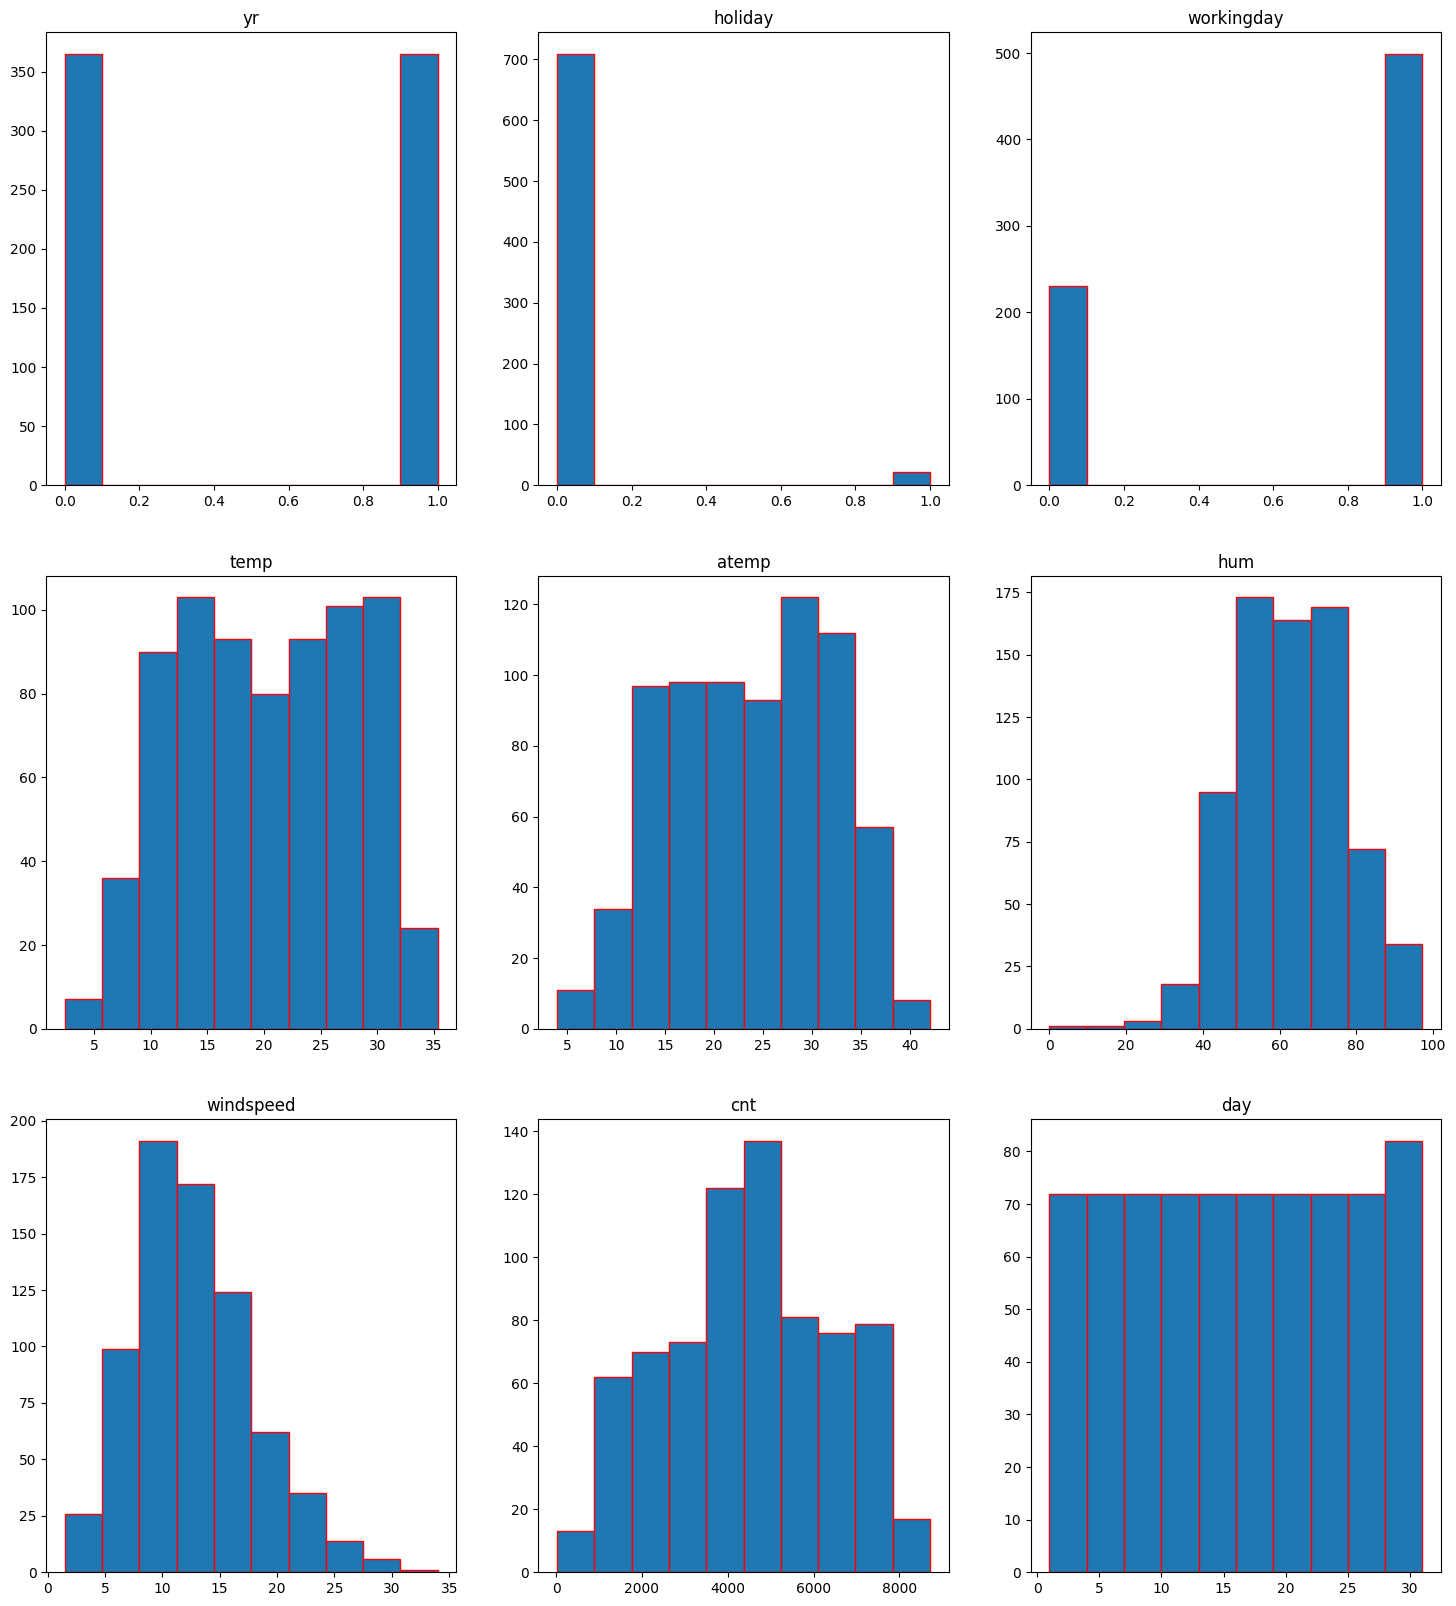

In [20]:
#Histogram
ncols=3
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(18, 20))
ax = ax.flatten()
for index, column in enumerate(numeric_cols):
    ax[index].hist(x=bike_data[column], edgecolor='red')
    ax[index].set_title(column)
plt.show()

<b>Bivariate Analysis</b>

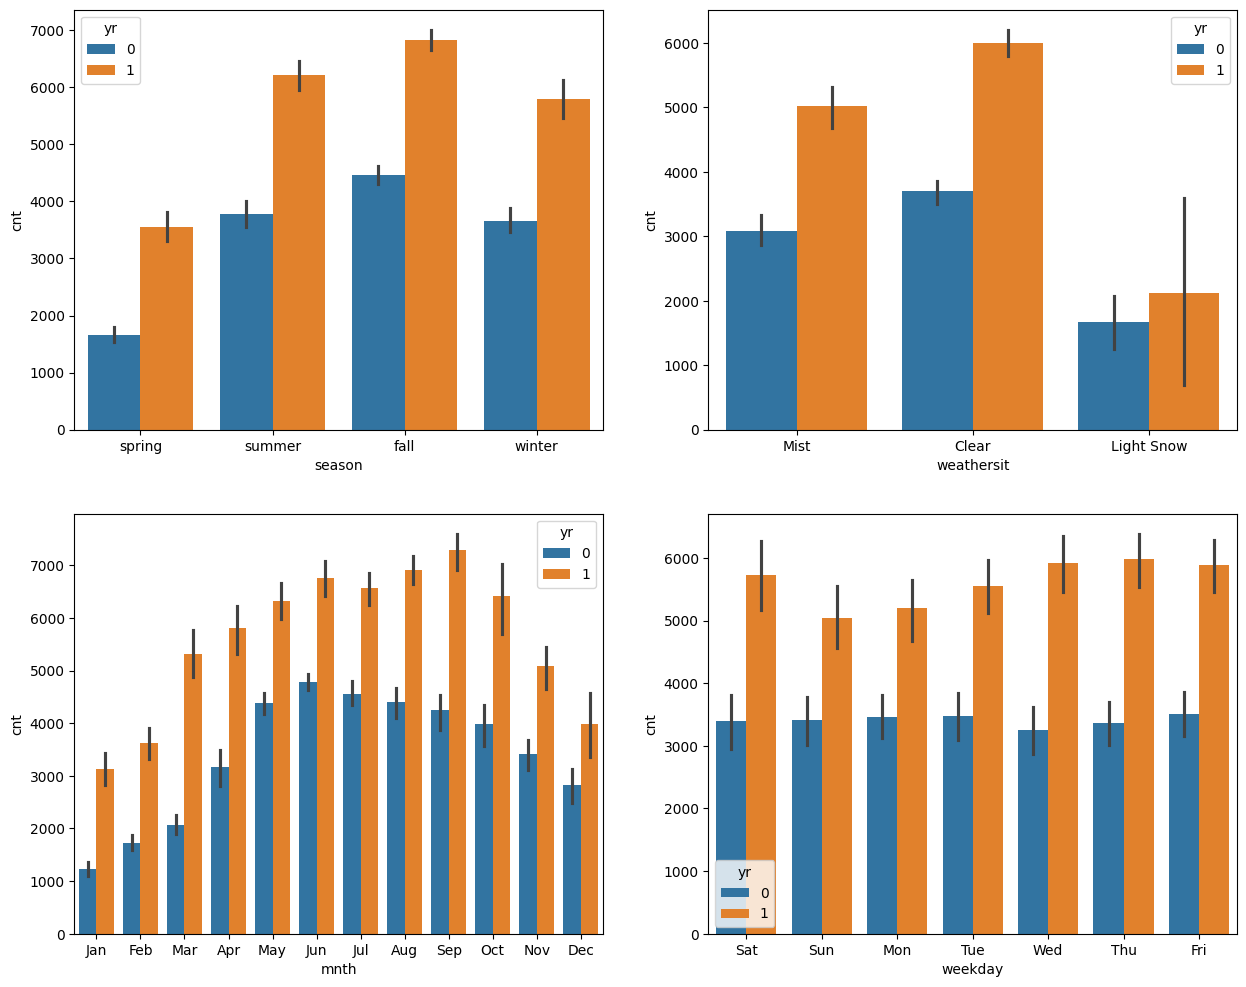

In [21]:
# Bar chart between categorical columns and cnt with yr
ncols=2
nrows=2
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=(15, 12))
ax = ax.flatten()
for index, column in enumerate(categorical_cols):
    sns.barplot(data=bike_data,x=column,y='cnt',hue='yr', ax=ax[index])

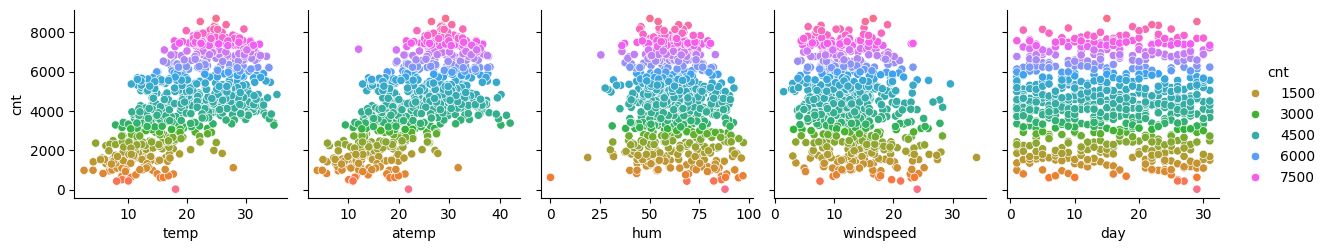

In [22]:
# drawing pairplot between the numerical variables
columns_to_plot = [col for col in numeric_cols if col not in ['yr', 'cnt', 'holiday','workingday']]
sns.pairplot(data=bike_data,x_vars=columns_to_plot,y_vars='cnt',  hue = 'cnt', palette="husl")
plt.show()


<b> Multi variate Analysis - HeatMap to find the corellation</b>

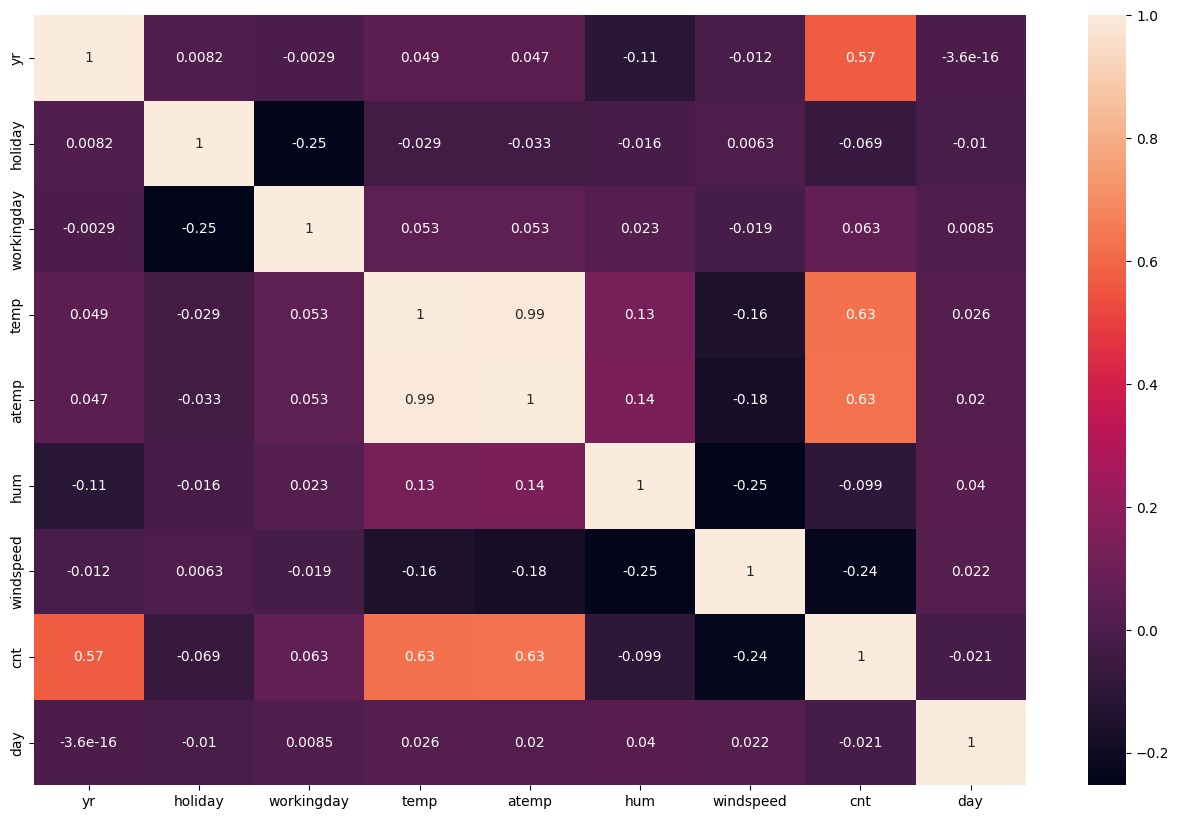

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data[numeric_cols].corr(), annot = True)
plt.show()

# Step 4: Modelling

In [24]:
# Create dummy variables for categorical features
bike_data = pd.get_dummies(bike_data, columns=categorical_cols, drop_first=True, dtype=int)
print(bike_data.head())

   yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   day  season_spring  ...  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
0    1              1  ...         0         0         0         0   
1    2              1  ...         0         0         0         0   
2    3              1  ...         0         0         0         0   
3    4              1  ...         0         0         0         0   
4    5              1  ...         0         0         0         0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            0            1            0      

In [25]:
# Split the data into training and testing sets
np.random.seed(0)
bike_data_train, bike_data_test = train_test_split(bike_data,
                                                   train_size = 0.7, 
                                                   test_size = 0.3, 
                                                   random_state = 100)
display(bike_data_train.shape)
display(bike_data_test.shape)

(510, 31)

(219, 31)

In [26]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_data_train[num_vars] = scaler.fit_transform(bike_data_train[num_vars])

In [27]:
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,16,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,31,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,3,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,30,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,28,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
bike_data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,season_spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,15.613725,0.243137,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,8.899450,0.429398,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


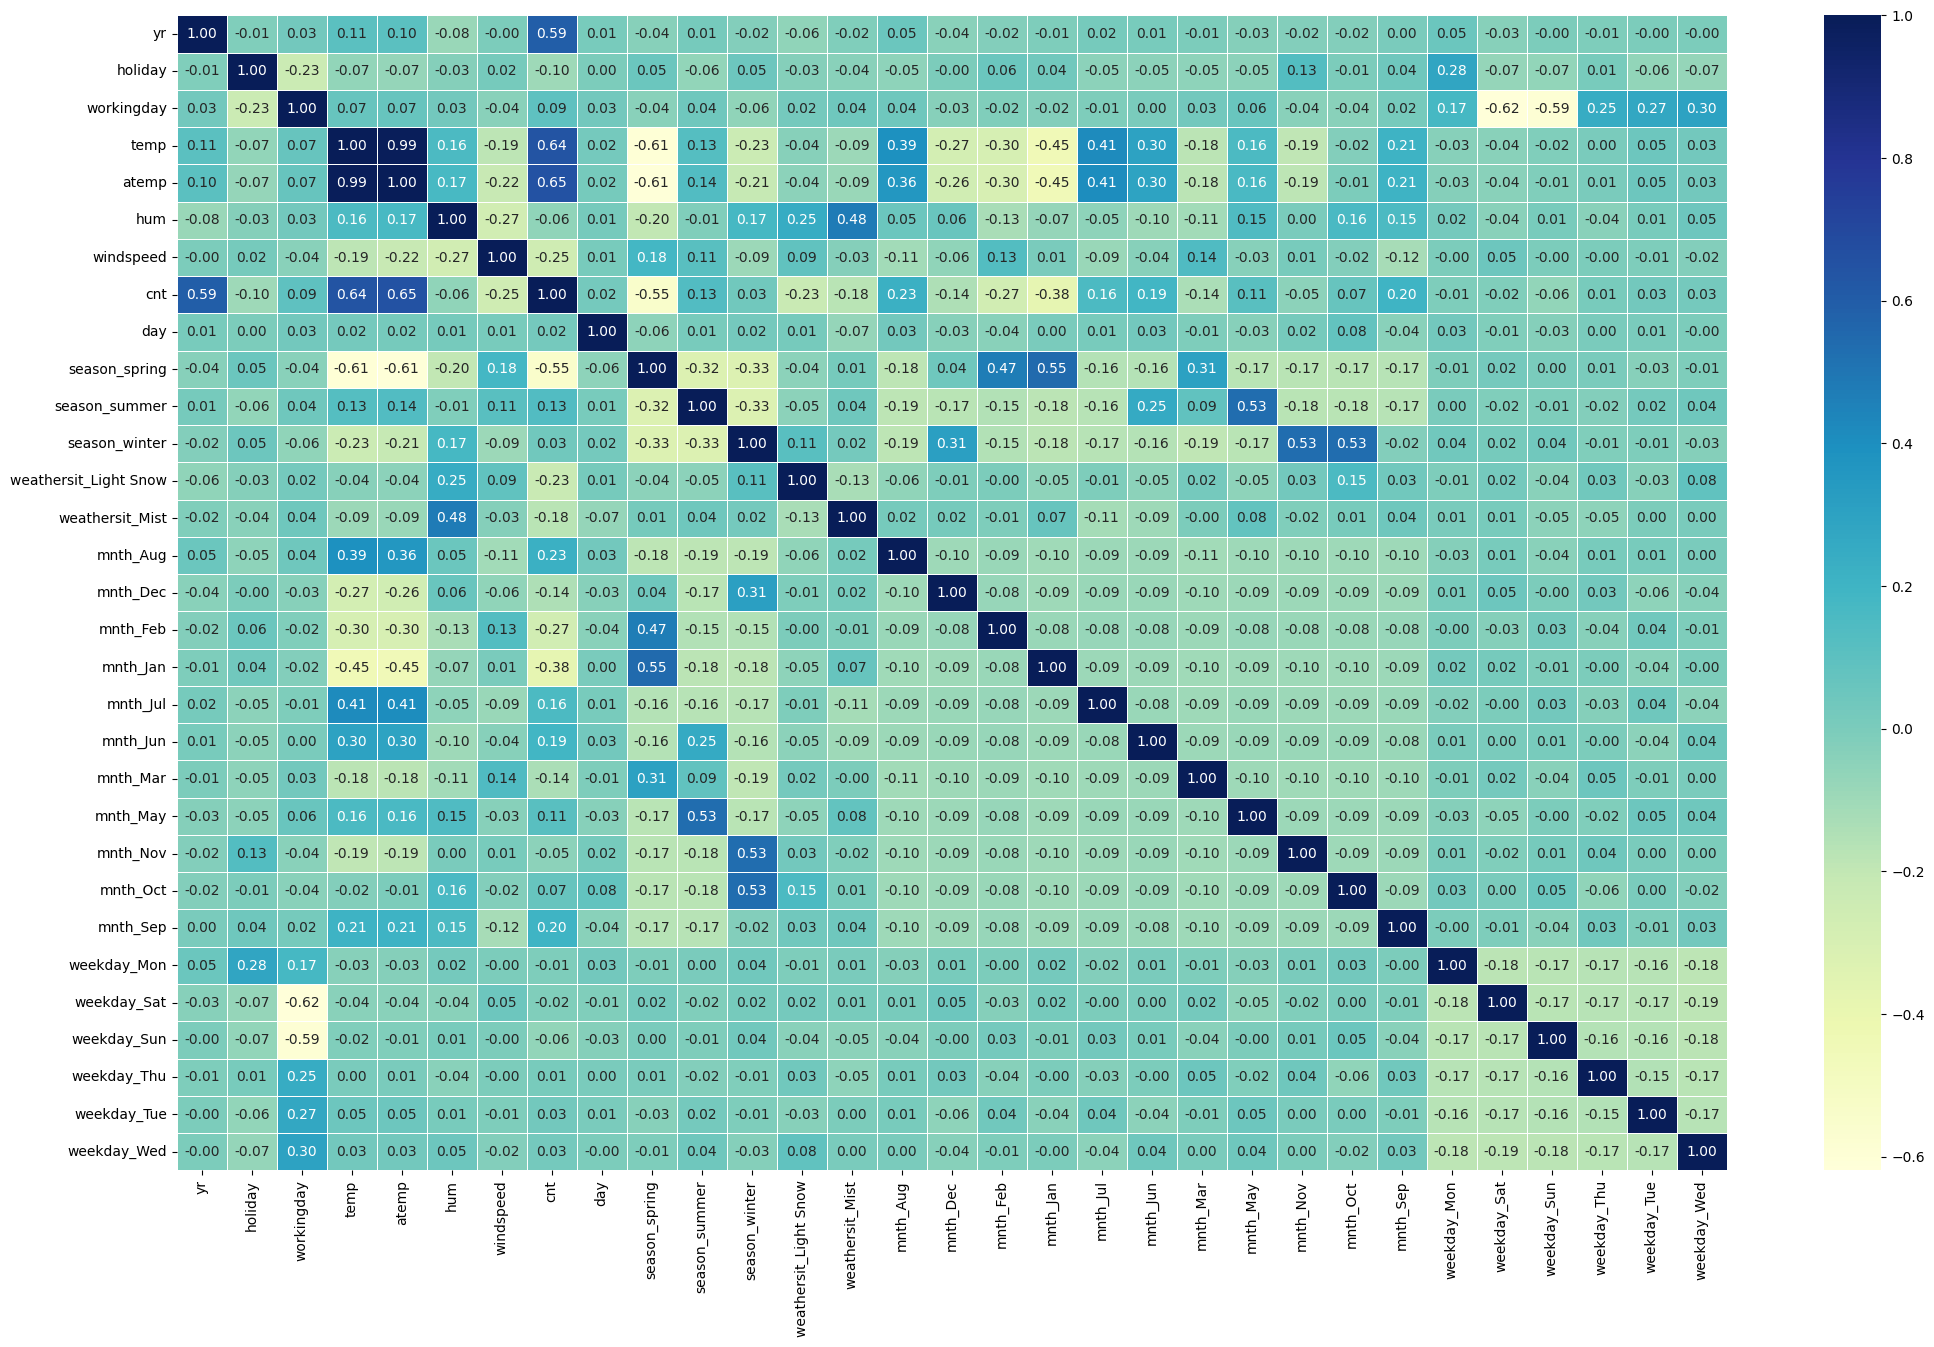

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(bike_data_train.corr(), annot = True, cmap="YlGnBu",fmt='.2f', linewidths=0.5)
plt.show()

### Model Training : Dividing into X and Y sets for the model building

In [30]:
#cnt target variable
y_train = bike_data_train.pop('cnt')
X_train = bike_data_train 

# Step 5 : Building a linear model

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X=X_train, y=y_train)

In [33]:
#To get the RFE rankings
display(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
#display the columns selected by RFE
display(col)

[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.True_, np.int64(1)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.False_, np.int64(5)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('day', np.False_, np.int64(16)),
 ('season_spring', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('weathersit_Light Snow', np.True_, np.int64(1)),
 ('weathersit_Mist', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(7)),
 ('mnth_Dec', np.False_, np.int64(3)),
 ('mnth_Feb', np.False_, np.int64(4)),
 ('mnth_Jan', np.True_, np.int64(1)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(14)),
 ('mnth_Mar', np.False_, np.int64(15)),
 ('mnth_May', np.False_, np.int64(6)),
 ('mnth_Nov', np.False_, np.int64(2)),
 ('mnth_Oct', np.False_, np.int64(11)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Mon', np.False_, np.int64(9)),
 ('weekday_Sat', n

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light Snow', 'weathersit_Mist', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat'],
      dtype='object')

In [34]:
#Taking RFE provided columns to learn the model
X_train_by_RFE = X_train[col]

In [35]:
def build_model(X, y):
    X_sm = sm.add_constant(X)
    lm = sm.OLS(y, X_sm).fit()
    return lm

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def build_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
print(X_train_by_RFE.head())

     yr  holiday  workingday      temp       hum  windspeed  season_spring  \
653   1        0           1  0.509887  0.575354   0.300794              0   
576   1        0           1  0.815169  0.725633   0.264686              0   
426   1        0           0  0.442393  0.640189   0.255342              1   
728   1        0           0  0.245101  0.498067   0.663106              1   
482   1        0           0  0.395666  0.504508   0.188475              0   

     season_summer  season_winter  weathersit_Light Snow  weathersit_Mist  \
653              0              1                      0                0   
576              0              0                      0                0   
426              0              0                      0                1   
728              0              0                      0                0   
482              1              0                      0                1   

     mnth_Jan  mnth_Jul  mnth_Sep  weekday_Sat  
653         0      

In [38]:
lm = build_model(X_train_by_RFE, y_train)
vif = build_VIF(X_train_by_RFE)
#display the values
display(lm.summary())
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          2.31e-191
Time:                        17:07:10   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2510      0.036      6.949      0.000       0.180       0.322
yr                        0.2305      0.008     28.807      0.000       0.215       0.246
holiday                  -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                0.0435      0.012      3.781      0.000       0.021       0.066
temp                      0.5098      0.034     14.851      0.000       0.442       0.577
hum                      -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer             0.0497      0.015      3.346      0.001       0.020       0.079
season_winter             0.0944      0.017      5.479      0.000       0.061       0.128
weathersit_Light Snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist          -0.0578      0.010     -5.574      0.000      -0.078      -0.037
mnth_Jan                 -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                 -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                  0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat               0.0537      0.014      3.707      0.000       0.025       0.082
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
10,weathersit_Mist,2.29
0,yr,2.09
14,weekday_Sat,1.98


In [39]:
#Humidity is having high VIF value and hence removing it
X_train_by_RFE = X_train_by_RFE.drop('hum', axis=1)
#Building the model again
lm = build_model(X_train_by_RFE, y_train)
vif = build_VIF(X_train_by_RFE)
#display the values
display(lm.summary())
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          7.33e-189
Time:                        17:07:10   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1737      0.031      5.525      0.000       0.112       0.235
yr                        0.2344      0.008     29.019      0.000       0.218       0.250
holiday                  -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                0.0465      0.012      3.983      0.000       0.024       0.069
temp                      0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer             0.0434      0.015      2.890      0.004       0.014       0.073
season_winter             0.0797      0.017      4.650      0.000       0.046       0.113
weathersit_Light Snow    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist          -0.0826      0.009     -9.592      0.000      -0.100      -0.066
mnth_Jan                 -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                 -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                  0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Sat               0.0584      0.015      3.980      0.000       0.030       0.087
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
13,weekday_Sat,1.97
10,mnth_Jan,1.62
11,mnth_Jul,1.59


In [40]:
#workingday is having high VIF value and hence removing it
X_train_by_RFE = X_train_by_RFE.drop('workingday', axis=1)
#Building the model again
lm = build_model(X_train_by_RFE, y_train)
vif = build_VIF(X_train_by_RFE)
#display the values
display(lm.summary())
display(vif)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.21e-186
Time:                        17:07:10   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2121      0.030      6.986      0.000       0.152       0.272
yr                        0.2346      0.008     28.628      0.000       0.219       0.251
holiday                  -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp                      0.4741      0.034     13.868      0.000       0.407       0.541
windspeed                -0.1570      0.025     -6.231      0.000      -0.207      -0.108
season_spring            -0.0613      0.021     -2.895      0.004      -0.103      -0.020
season_summer             0.0425      0.015      2.791      0.005       0.013       0.072
season_winter             0.0769      0.017      4.425      0.000       0.043       0.111
weathersit_Light Snow    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
weathersit_Mist          -0.0808      0.009     -9.256      0.000      -0.098      -0.064
mnth_Jan                 -0.0383      0.018     -2.146      0.032      -0.073      -0.003
mnth_Jul                 -0.0512      0.019     -2.758      0.006      -0.088      -0.015
mnth_Sep                  0.0760      0.017      4.498      0.000       0.043       0.109
weekday_Sat               0.0201      0.011      1.788      0.074      -0.002       0.042
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,season_spring,2.76
5,season_summer,2.23
0,yr,2.07
6,season_winter,1.80
9,mnth_Jan,1.61
10,mnth_Jul,1.59
8,weathersit_Mist,1.56
11,mnth_Sep,1.34


# Step 6: Verifying Model against trained data

In [41]:
lr_model_final = lm;
X_train_final = sm.add_constant(X_train_by_RFE)
lr_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.21e-186
Time:                        17:07:10   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2121      0.030      6.986      0.000       0.152       0.272
yr                        0.2346      0.008     28.628      0.000       0.219       0.251
holiday                  -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp                      0.4741      0.034     13.868      0.000       0.407       0.541
windspeed                -0.1570      0.025     -6.231      0.000      -0.207      -0.108
season_spring            -0.0613      0.021     -2.895      0.004      -0.103      -0.020
season_summer             0.0425      0.015      2.791      0.005       0.013       0.072
season_winter             0.0769      0.017      4.425      0.000       0.043       0.111
weathersit_Light Snow    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
weathersit_Mist          -0.0808      0.009     -9.256      0.000      -0.098      -0.064
mnth_Jan                 -0.0383      0.018     -2.146      0.032      -0.073      -0.003
mnth_Jul                 -0.0512      0.019     -2.758      0.006      -0.088      -0.015
mnth_Sep                  0.0760      0.017      4.498      0.000       0.043       0.109
weekday_Sat               0.0201      0.011      1.788      0.074      -0.002       0.042
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Calculating the y predicted based on model coefficients
y_train_predicted = lm.predict(X_train_final)
y_train_predicted.head()

653    0.718111
576    0.740431
426    0.494396
728    0.397485
482    0.586531
dtype: float64

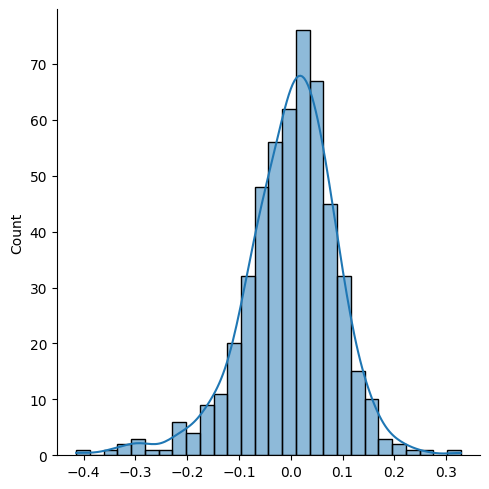

In [43]:
#calculating the error terms
residual = y_train-y_train_predicted
sns.displot(residual, kde=True)

<b>Error terms are normally discributed</b>

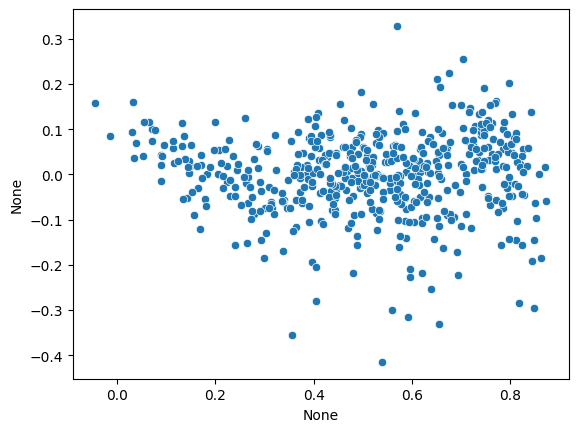

In [44]:
sns.scatterplot(x=y_train_predicted,y=(y_train - y_train_predicted))
plt.show()

# Verifying the model against test data

In [45]:
bike_data_test[num_vars] = scaler.transform(bike_data_test[num_vars])
print(bike_data_test.describe())

               yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt         day  season_spring  ...    mnth_May  \
count  219.000000  219.000000  219.000000     219.000000  ...  219.000000   
mean     0.313350    0.520592   16.018265       0.255708  ...    0.086758   
std      0.159947    0.218435    8.5750

In [46]:
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [47]:
X_train_final.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow',
       'weathersit_Mist', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep', 'weekday_Sat'],
      dtype='object')

In [48]:
#drop features
columns_to_keep = X_train_final.columns[X_train_final.columns != 'const']
X_test = X_test[columns_to_keep]
X_test.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat
184,0,1,0.831783,0.084219,0,0,0,0,1,0,1,0,0
535,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,1,0,0,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0


In [49]:
# Method to build LM and VIF
def build_model_and_check(X, y):
    lm = build_model(X, y)
    vif = build_VIF(X)
    display(lm.summary())
    display(vif)
    return lm

In [50]:
lm = build_model_and_check(X_test, y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     72.51
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.42e-69
Time:                        17:07:10   Log-Likelihood:                 211.52
No. Observations:                 219   AIC:                            -395.0
Df Residuals:                     205   BIC:                            -347.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2224      0.048      4.631      0.000       0.128       0.317
yr                        0.2409      0.013     18.283      0.000       0.215       0.267
holiday                  -0.0617      0.035     -1.773      0.078      -0.130       0.007
temp                      0.4276      0.052      8.207      0.000       0.325       0.530
windspeed                -0.0369      0.044     -0.842      0.401      -0.123       0.049
season_spring            -0.1362      0.034     -3.964      0.000      -0.204      -0.068
season_summer             0.0131      0.025      0.534      0.594      -0.035       0.062
season_winter             0.0642      0.028      2.267      0.024       0.008       0.120
weathersit_Light Snow    -0.2418      0.041     -5.868      0.000      -0.323      -0.161
weathersit_Mist          -0.0650      0.014     -4.553      0.000      -0.093      -0.037
mnth_Jan                 -0.0029      0.028     -0.100      0.920      -0.059       0.053
mnth_Jul                 -0.0398      0.029     -1.368      0.173      -0.097       0.018
mnth_Sep                  0.0373      0.026      1.418      0.158      -0.015       0.089
weekday_Sat               0.0204      0.020      1.007      0.315      -0.020       0.060
==============================================================================
Omnibus:                       23.511   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.663
Skew:                          -0.697   Prob(JB):                     1.33e-07
Kurtosis:                       4.237   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,7.04
3,windspeed,5.04
5,season_summer,2.69
4,season_spring,2.68
10,mnth_Jul,2.10
0,yr,2.00
6,season_winter,1.80
8,weathersit_Mist,1.56
9,mnth_Jan,1.51
11,mnth_Sep,1.42


# Predicting 

In [51]:
X_test_sm = sm.add_constant(X_test)
y_test_predicted = lm.predict(X_test_sm)

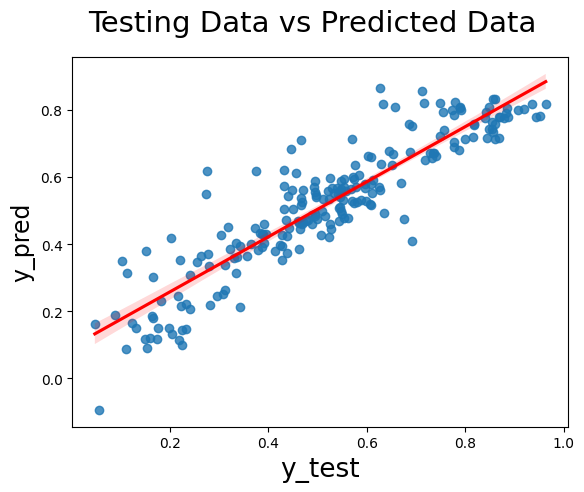

In [52]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_predicted, fit_reg=True, line_kws={'color': 'red'})
fig.suptitle('Testing Data vs Predicted Data', fontsize = 21)
plt.xlabel('y_test', fontsize = 19)
plt.ylabel('y_pred', fontsize = 17)   
plt.show()

In [53]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
print('R2 for train data: ',r2_score(y_train, y_train_predicted))
print('R2 for test data: ',r2_score(y_test, y_test_predicted))

R2 for train data:  0.838297606495084
R2 for test data:  0.8213722472124625


In [55]:
# checking the MSE for both training and testing dataset.
print('MSS for train data: ',mean_squared_error(y_true=y_train,y_pred=y_train_predicted))
print('MSS for test data: ',mean_squared_error(y_true=y_test,y_pred=y_test_predicted))

MSS for train data:  0.008140571173184723
MSS for test data:  0.008484069476713126


In [56]:
print(lr_model_final.params)

const                    0.212097
yr                       0.234633
holiday                 -0.093921
temp                     0.474065
windspeed               -0.157048
season_spring           -0.061299
season_summer            0.042485
season_winter            0.076900
weathersit_Light Snow   -0.286860
weathersit_Mist         -0.080792
mnth_Jan                -0.038289
mnth_Jul                -0.051174
mnth_Sep                 0.076032
weekday_Sat              0.020135
dtype: float64


# Step 7 : Conclusion

<b>1) R2 and Adjusted R2 values of both train and test data falls are 83% and 82% and this shows the data we can explain correctly.</b></br>
<b>2) Increase in holiday, windspeed, spring, snow, mist, January month & july month values will impact the count.</b></br>
<b>3) Increase in year, temp, summer, winter, sep month & saturday values leads to increase in count.</b></br>
<b>4) Temperature, Year, season values are important in predicting the demand of shared bikes.</b></br>